

## <center>Data Bootcamp 🚀</center>

<center>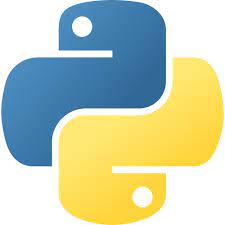</center>

### <center>Session: Decision Tree - Solution </center>

<center>Course provided by:</center>

[<center>Professor Gaëtan Brison</center>](https://github.com/gaetanbrison)
___

# 🌳 Tree Classifier with Python¶

## 📤 Import Libraries


In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import (
    metrics,
)  # Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

%matplotlib inline

## 💾 Data¶
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the Kaggle data set to follow along.

In [5]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
loan = pd.read_csv("Data/Loan_Status.csv")
loan.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Married_yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Graduate', 'Self_Employed_yes', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [3]:
loan.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_yes,Rural,Semiurban,Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status        614 non-null    int64  
 6   Married_yes        614 non-null    int64  
 7   Dependents_0       614 non-null    int64  
 8   Dependents_1       614 non-null    int64  
 9   Dependents_2       614 non-null    int64  
 10  Dependents_3+      614 non-null    int64  
 11  Graduate           614 non-null    int64  
 12  Self_Employed_yes  614 non-null    int64  
 13  Rural              614 non-null    int64  
 14  Semiurban          614 non-null    int64  
 15  Urban              614 non-null    int64  
dtypes: float64(4), int64(12)
m

In [6]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_yes,Rural,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296,0.653094,0.586319,0.166124,0.164495,0.083062,0.781759,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973,0.476373,0.492894,0.372495,0.371027,0.276201,0.413389,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## replace missing value with mean value of column
loan.fillna(loan.mean(), inplace=True)  # For numerical columns
loan["Loan_Status"].fillna(
    loan["Loan_Status"].mode()[0], inplace=True
)  # For a categorical column

loan["Property_Area"].fillna(loan["Property_Area"].mode()[0], inplace=True)
loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0], inplace=True)
loan["Education"].fillna(loan["Education"].mode()[0], inplace=True)
loan["Married"].fillna(loan["Married"].mode()[0], inplace=True)
loan["Gender"].fillna(loan["Gender"].mode()[0], inplace=True)
## change categorical text into categorical numeric
loan["Loan_Status"] = loan["Loan_Status"].astype("category").cat.codes
loan["Property_Area"] = loan["Property_Area"].astype("category").cat.codes
loan["Self_Employed"] = loan["Self_Employed"].astype("category").cat.codes
loan["Education"] = loan["Education"].astype("category").cat.codes
loan["Married"] = loan["Married"].astype("category").cat.codes
loan["Gender"] = loan["Gender"].astype("category").cat.codes


In [ ]:
pima["Loan_Amount"].fillna(loan["Loan_Amount"].mode()[0], inplace=True)

## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [8]:
X = loan.drop(["Loan_Status"], axis=1)
y = loan.Loan_Status  # Target variable


## 🧱Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)  # 70% training and 30% test


## ⚙️ Building Decision Tree Model
Let's create a decision tree model using Scikit-learn.

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


## 💯 Evaluating the Model
Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7723577235772358


We got a classification rate of 67.53%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

## 📊 Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

**pip install graphviz**

**pip install pydotplus**

The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.

In [ ]:
feature_cols = X.columns
feature_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Graduate',
       'Self_Employed_yes', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

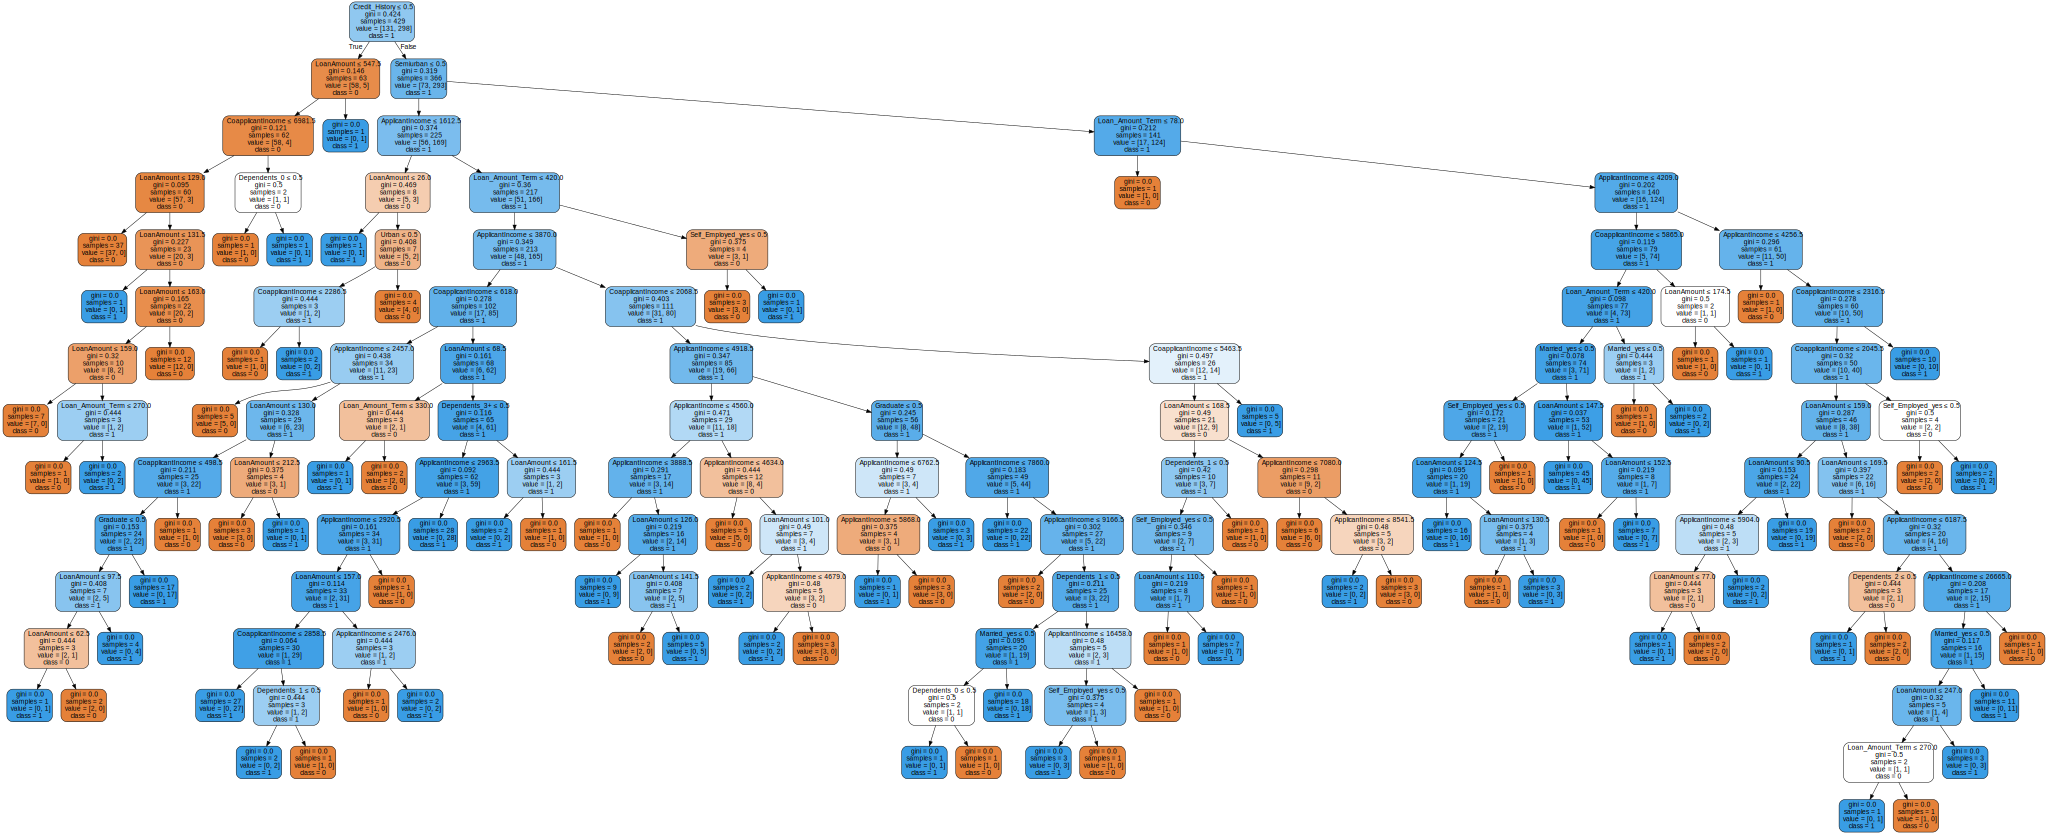

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = X.columns
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_cols,
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
!pip install six

## Optimizing Decision Tree Performance
* criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7837837837837838


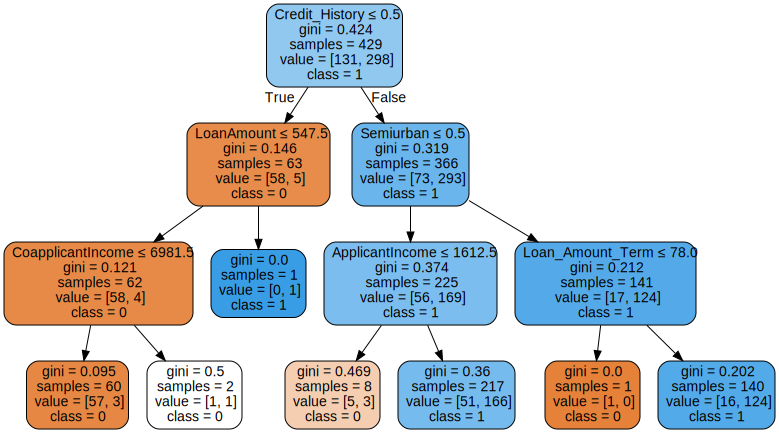

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = X.columns
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_cols,
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph

Well, the classification rate increased to 77.05%, which is better accuracy than the previous model.

## Let's work with Shapash to improve explanation of important variables

In [ ]:
!pip install shapash --quiet


In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer(clf)

In [ ]:
y_pred = pd.Series(y_pred)
X_test = X_test.reset_index(drop=True)
xpl.compile(x=X_test, y_pred=y_pred)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7c27038fb520>


In [ ]:
xpl.plot.features_importance()

In [ ]:
import random

subset = random.choices(X_test.index, k=50)
xpl.plot.features_importance(selection=subset)

In [ ]:
xpl.plot.contribution_plot("ApplicantIncomev")

## Hyperparameter tuning

In [ ]:
%%capture
!pip install mlflow
!pip install pyngrok

In [ ]:
import mlflow
from mlflow import log_metric, log_param, log_artifact
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import joblib

# Start MLflow run
with mlflow.start_run():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Create a decision tree classifier
    dt = DecisionTreeClassifier(random_state=42)

    # Define a parameter grid to search over
    param_grid = {"max_depth": [3, 5, 10], "min_samples_leaf": [1, 2, 4]}

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

    # Perform grid search to find the best parameters
    grid_search.fit(X_train, y_train)

    # Log the best parameters
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)

    # Evaluate the model
    best_dt = grid_search.best_estimator_
    test_score = best_dt.score(X_test, y_test)

    # Log the performance metric
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    log_metric("accuracy", accuracy)
    log_metric("precision", precision)
    log_metric("recall", recall)
    log_metric("f1", f1)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    # Log the best model in MLflow
    mlflow.sklearn.log_model(best_dt, "best_dt")

    # Save the model to the MLflow artifact store
    mlflow.sklearn.save_model(best_dt, "best_dt_model")

Accuracy: 0.654054054054054
Precision: 0.6818181818181818
Recall: 0.875
F1 Score: 0.7664233576642336


In [ ]:
get_ipython().system_raw("mlflow ui --port 5003 &")

In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 1.057s


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.5.0       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.5.0   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰────────────────────────────────────────────────────────────────╯



In [ ]:
!curl ipv4.icanhazip.com

35.237.246.133


In [ ]:
!lt --port 5003

your url is: https://funny-trains-hope.loca.lt
^C


## Congratulations you made it 🎉